In [1]:
class Dog:
    def is_puppy(self):
        return self.age <= 2
    
    def speak(self):
        if not self.is_puppy():
            print(self.name + ": bark!")
        else:
            print(self.name + ":" +" bark!" * 10)

    def birthdays(self, years=1):
        self.age += years
    
    # special method
    # in general is called a "constructor"
    def __init__(self, name, age): # auto-called when obj is created
        self.name = name
        self.age = age
    
    # for programmers to look at
    def __repr__(self):
        return f"Dog({repr(self.name)}, {self.age})"
        
    # for non-programmers
    def __str__(self):
        return f"a dog named {self.name}"
        
    # Jupyter special method
    def _repr_html_(self):
        return f"<h1>I am <i>{self.name}</i> the dog</h1>"
    
    def __eq__(self, right):
        return self.name == right.name and self.age == right.age
    
    def __lt__(self, right):
        return self.age < right.age

class Cat:
    def speak(self):
        print("meow")

c = Cat()
dog1 = Dog("Fido", 1) # instantiation+initialization
dog2 = Dog("Sam", 5)
dog3 = Dog("Cuddles", 3)

In [2]:
dogs = [dog1, dog2, dog3]
dogs

[Dog('Fido', 1), Dog('Sam', 5), Dog('Cuddles', 3)]

In [3]:
dog2 < dog3

False

In [4]:
# dog2 <= dog3

In [5]:
sorted(dogs)

[Dog('Fido', 1), Dog('Cuddles', 3), Dog('Sam', 5)]

In [6]:
print(repr(dog1))

Dog('Fido', 1)


In [7]:
fido_v2 = Dog('Fido', 1)

In [8]:
dog1 == fido_v2

True

In [9]:
dog1 is fido_v2

False

In [10]:
dog1 == dog2

False

# Indexing

In [11]:
lst = [2,5,3]
lst[1]

5

In [12]:
range(3, 7)

range(3, 7)

In [13]:
class Range:
    def __init__(self, v1, v2=None):
        if v2 == None:
            self.lower = 0
            self.upper = v1
        else:
            self.lower = v1
            self.upper = v2
            
    def __repr__(self):
        return f"Range({self.lower}, {self.upper})"
        
    def __getitem__(self, lookup):
        if not isinstance(lookup, int):
            raise NotImplementedError("only int idx supported")            
        if lookup < 0:
            raise NotImplementedError("neg idx not supported")
        if self.lower + lookup >= self.upper:
            raise IndexError("bad idx")
        return self.lower + lookup
    
    def __len__(self):
        return self.upper - self.lower

In [14]:
r = Range(3, 8)
r

Range(3, 8)

In [15]:
r[2]

5

In [16]:
len(r)

5

In [17]:
list(r)

[3, 4, 5, 6, 7]

In [18]:
for i in r:
    print(i)

3
4
5
6
7


In [19]:
r[2] # r will be go to the 1st param, 2 will go to the 2nd param

5

# Context Managers

In [20]:
f = open("example.txt", "w")
f.write("hello")
# what happens if I crash here?
f.write("world")
f.close()

In [21]:
with open("example.txt", "w") as f:
    f.write("hello")
    # what happens if I crash here?
    f.write("world")
# AUTOMATIC: f.close()

In [22]:
import matplotlib.pyplot as plt
print(plt.rcParams["font.size"])

10.0


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

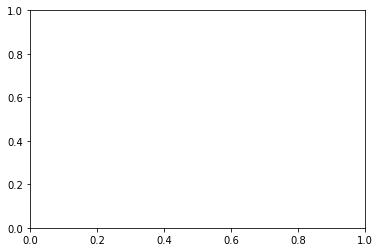

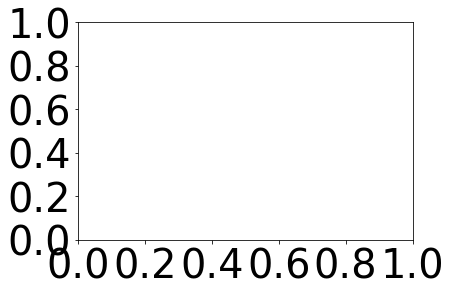

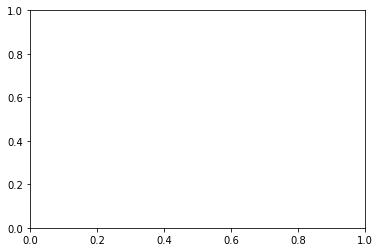

In [23]:
class DoubleFont:
    def __enter__(self):
        self.orig_size = plt.rcParams["font.size"]
        plt.rcParams["font.size"] *= 2
    
    def __exit__(self, exc_type, exc_value, traceback):
        plt.rcParams["font.size"] = self.orig_size

plt.subplots()
with DoubleFont():
    with DoubleFont():
        plt.subplots()
plt.subplots()